# 과적합과 일반화
- **Generalize(일반화)**
    - 모델이 새로운 데이터셋에 대하여 정확히 예측하면 일반화 되었다고 한다
        - 모집단 전체에 대한 데이터의 일반적인 특성을 잘 찾은 모델의 상태를 일반화라고 한다
    - 모델이 훈련 데이터로 평가한 결과와 테스트 데이터로 평가한 결과의 차이가 거의 없고 좋은 평가지표를 보여준다

- **Overfitting(과대적합)**
    - 모델이 훈련 데이터에 대한 예측성능은 너무 좋지만 일반성이 떨어져 새로운 데이터에 대해선 성능이 좋지 않은 것을 Overfitting이라 한다.
    - 모델이 훈련 데이터 세트의 특징에 너무 맞춰 학습되어 일반적으로 나타나지 않을 특징까지 학습해 새로운 데이터셋에 대한 예측 성능이 떨어진다

- **Underfitting(과소적합)**
    - 모델이 훈련 데이터와 테스트 데이터셋 모두에서 성능이 안좋은 것
    - 모델이 너무 간단해 훈련 데이터에 대해 충분히 학습하지 못해 데이터셋의 패턴들을 다 찾지 못해 발생

![image](https://velog.velcdn.com/images/ppippi/post/a79fad17-6d14-4fcd-b4ee-caa0d55a197b/image.png)

## Overfitting(과대적합)의 원인
- 학습 데이터 양에 비해 모델이 너무 복잡한 경우 발생
    - 데이터의 양을 늘린다
        - 시간과 돈이 들기 때문에 현실적으로 어렵다
    - 모델을 좀 더 단순하게 만든다
        - 사용한 모델보다 좀 더 단순한 모델을 사용한다
        - 모든 모델은 모델의 복잡도를 변경할 수 있는 **규제와 관련된 하이퍼파라미터**를 제공하는데 이것을 조절한다

## Underfitting(과소적합)의 원인
- 데이터양에 비해 모델이 너무 단순한 경우 발생
    - 좀 더 복잡한 모델을 사용한다
    - 모델이 제공하는 규제 하이퍼파라미터를 조절한다

> - 복잡한 모델, 단순한 모델
>   - 이상치 같은 목잡한 값들에 반응하는(패턴을 찾는) 모델
>   - 이상치에 약한 모델

## 규제 하이퍼파라미터란?
- 모델의 복잡도를 규제하는 하이퍼파라미터로 Overfitting이나 Underfitting인 경우 이값을 조정하여 모델이 일반화 되도록 도와준다
- 이 규제 하이퍼파라밈터들은 모든 머신러닝 모델마다 있다

> #### 하이퍼파라미터란
> - **하이퍼파라미터(Hyper Parameter)**
>   - 모델의 성능에 영향을 끼치는 파라미터 값으로 모델 생성시 사람이 직접 지정하는 값
> - **하이퍼파라미터 튜닝(Hyper Parameter Tunning)**
>   - 모델의 성능을 가장 높일 수 있는 하이퍼파라미터를 찾는 작업
> - **파라미터(Parameter)**
>   - 머신러닝에서 파라미터는 모델이 데이터 학습을 통해 직접 찾아야 하는 값을 말한다

### 위스콘신 유방암 데이터셋 모델링
#### 데이터 로딩 및 train/test set 분리

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

data = load_breast_cancer()
X, y = data.data, data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, random_state = 0)

#### 모델 생성, 학습, 추론
- DecisionTreeClassifier

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def tree_modeling(X, y, max_depth = None):
    tree = DecisionTreeClassifier(max_depth = max_depth, random_state = 0)
    tree.fit(X, y)
    
    return tree

def tree_accuracy(X, y, model, title):
    print(title, accuracy_score(y, model.predict(X)))

In [5]:
print("max_depth = 1")
tree = tree_modeling(X_train, y_train, 1)
tree_accuracy(X_train, y_train, tree, 'train set')
tree_accuracy(X_test, y_test, tree, 'test_set')

max_depth = 1
train set 0.9295774647887324
test_set 0.8881118881118881


In [8]:
print("max_depth = 2")
tree2 = tree_modeling(X_train, y_train, 2)
tree_accuracy(X_train, y_train, tree2, 'train set')
tree_accuracy(X_test, y_test, tree2, 'test set')

max_depth = 2
train set 0.931924882629108
test set 0.8881118881118881


In [9]:
print("max_depth = 3")
tree3 = tree_modeling(X_train, y_train, 3)
tree_accuracy(X_train, y_train, tree3, 'train set')
tree_accuracy(X_test, y_test, tree3, 'test set')

max_depth = 3
train set 0.9765258215962441
test set 0.916083916083916


In [10]:
print("max_depth = 5")
tree5 = tree_modeling(X_train, y_train, 5)
tree_accuracy(X_train, y_train, tree5, 'train set')
tree_accuracy(X_test, y_test, tree5, 'test set')

max_depth = 5
train set 1.0
test set 0.9020979020979021


#### 트리 구조 시각화 - graphviz 이용

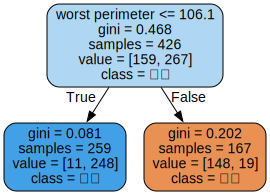

In [11]:
from sklearn.tree import export_graphviz
from graphviz import Source

graph = Source(export_graphviz(tree,
                               feature_names = data.feature_names,
                               class_names = ['악성', '양성'],
                               rounded = True,
                               filled = True # 함수 클래스를 색으로 확인 할 수 있도록 색을 채움
                               ))

graph

In [ ]:
"""# 현재 노드를 분리하기 위한 질문
worst perimeter <= 106.1
---------------------------
# 현재 노드의 상태
gini = 0.468          # 지니계수 - 불순도. 0(불순도가 가장 낮다) ~ 0.5(불순도가 가장 높다)
samples = 426         # 데이터 개수
value = [159, 267]    # 클래스별 데이터 개수
class = 양성          # 다수 클래스의 클래스 이름
"""

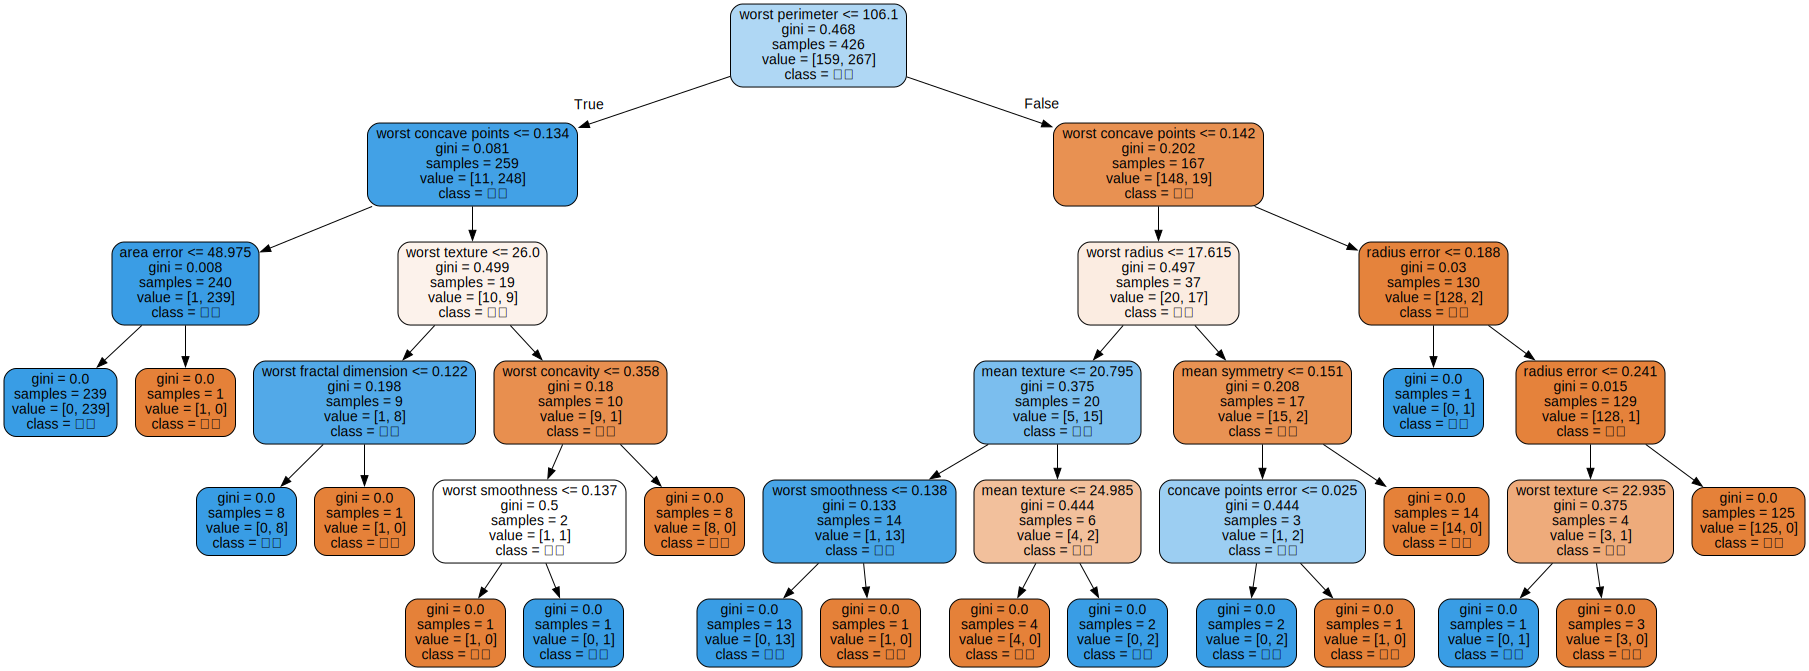

In [12]:
graph = Source(export_graphviz(tree5,
                               feature_names = data.feature_names,
                               class_names = ['악성', '양성'],
                               rounded = True, 
                               filled = True
                               ))
graph

In [14]:
import numpy as np

a = np.array([11, 248])
a / a.sum()

array([0.04247104, 0.95752896])

## DecisionTree 복잡도 제어(규제 파라미터)
- DecisionTree 모델을 복잡하게 하는 것은 노드가 너무 많이 만들어 지는 것이다
    - 노드가 많이 만들어 질수록 훈련 데이터셋에 Overfitting 된다
- 적절한 시점에 트리 생성을 중단해야 한다

- 모델의 복잡도 관련 주요 하이퍼파라미터
    - **max_depth** : 트리의 최대 깊이
    - **max_leaf_nodes** : 리프노드 개수
    - **min_samples_leaf** : 리프노드가 되기 위한 최소 샘플 수

## 최적의 하이퍼파라미터 찾기
### 최적의 max_depth 찾기

In [15]:
max_depth_candidate = [1, 2, 3, 4, 5, None]
train_acc_list = []
test_acc_list = []

for depth in max_depth_candidate:
    tree = DecisionTreeClassifier(max_depth = depth, random_state = 0)
    tree.fit(X_train, y_train)
    
    train_pred = tree.predict(X_train)
    test_pred = tree.predict(X_test)
    
    train_acc_list.append(accuracy_score(y_train, train_pred))
    test_acc_list.append(accuracy_score(y_test, test_pred))

### 결과 확인

In [17]:
import pandas as pd

result_df = pd.DataFrame({
    'max_depth' : max_depth_candidate, 
    'train' : train_acc_list, 
    'test' : test_acc_list
})

result_df

,max_depth,train,test
0,1.0,0.929577,0.888112
1,2.0,0.931925,0.888112
2,3.0,0.976526,0.916084
3,4.0,0.985915,0.909091
4,5.0,1.000000,0.902098
5,NaN,1.000000,0.902098


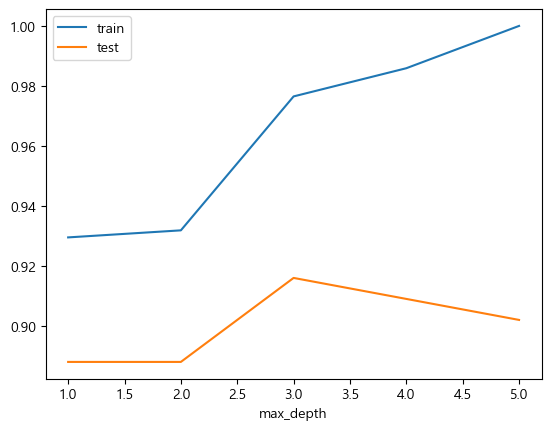

In [18]:
import matplotlib.pyplot as plt
result_df.set_index('max_depth').plot()
plt.show()